# 📧 Naive Bayes Spam Classification Assignment

## 🎯 วัตถุประสงค์
สร้าง Email Spam Classifier โดยใช้ Naive Bayes Algorithm จากข้อมูลความถี่ของคำต่าง ๆ ใน email

## 📊 ข้อมูลที่ใช้
ตารางความถี่ของคำใน email spam และ no spam:

| คำ | Spam | No Spam |
|-----|------|--------|
| **Total** | 25 | 75 |
| Buy | 20 | 5 |
| Cheap | 15 | 10 |
| Work | 5 | 30 |
| Free | 20 | 7 |
| Will | 4 | 40 |

## 📚 1. การตั้งค่าข้อมูลและ Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction

# ตั้งค่าการแสดงผล
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.precision', 4)

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 📊 2. การสร้างข้อมูลจากตาราง

In [2]:
# สร้างข้อมูลจากตารางที่กำหนด
data = {
    'Word': ['Total', 'Buy', 'Cheap', 'Work', 'Free', 'Will'],
    'Spam': [25, 20, 15, 5, 20, 4],
    'No_Spam': [75, 5, 10, 30, 7, 40]
}

df = pd.DataFrame(data)
print("📊 ตารางข้อมูลเดิม:")
print(df.to_string(index=False))

# แยกข้อมูล Total และคำศัพท์
total_row = df[df['Word'] == 'Total'].iloc[0]
words_df = df[df['Word'] != 'Total'].reset_index(drop=True)

print(f"\n📈 จำนวน email ทั้งหมด:")
print(f"   Spam emails: {total_row['Spam']}")
print(f"   No Spam emails: {total_row['No_Spam']}")
print(f"   Total emails: {total_row['Spam'] + total_row['No_Spam']}")

print("\n📝 คำศัพท์และความถี่:")
print(words_df.to_string(index=False))

📊 ตารางข้อมูลเดิม:
 Word  Spam  No_Spam
Total    25       75
  Buy    20        5
Cheap    15       10
 Work     5       30
 Free    20        7
 Will     4       40

📈 จำนวน email ทั้งหมด:
   Spam emails: 25
   No Spam emails: 75
   Total emails: 100

📝 คำศัพท์และความถี่:
 Word  Spam  No_Spam
  Buy    20        5
Cheap    15       10
 Work     5       30
 Free    20        7
 Will     4       40


## 🧮 3. การคำนวณ Prior Probability

In [3]:
# คำนวณ Prior Probability
total_emails = total_row['Spam'] + total_row['No_Spam']
spam_emails = total_row['Spam']
no_spam_emails = total_row['No_Spam']

# P(Spam) และ P(No Spam)
P_spam = spam_emails / total_emails
P_no_spam = no_spam_emails / total_emails

print("🎯 Prior Probabilities:")
print(f"P(Spam) = {spam_emails}/{total_emails} = {P_spam:.4f} ({P_spam*100:.2f}%)")
print(f"P(No Spam) = {no_spam_emails}/{total_emails} = {P_no_spam:.4f} ({P_no_spam*100:.2f}%)")
print(f"\nเศษส่วน:")
print(f"P(Spam) = {Fraction(spam_emails, total_emails)}")
print(f"P(No Spam) = {Fraction(no_spam_emails, total_emails)}")

# ตรวจสอบ
print(f"\n✅ ตรวจสอบ: {P_spam + P_no_spam} = 1.0")

🎯 Prior Probabilities:
P(Spam) = 25/100 = 0.2500 (25.00%)
P(No Spam) = 75/100 = 0.7500 (75.00%)

เศษส่วน:
P(Spam) = 1/4
P(No Spam) = 3/4

✅ ตรวจสอบ: 1.0 = 1.0


## 📊 4. การคำนวณ Conditional Probability สำหรับแต่ละคำ

In [4]:
# คำนวณ total words ในแต่ละ class
total_spam_words = words_df['Spam'].sum()
total_no_spam_words = words_df['No_Spam'].sum()

print(f"📊 จำนวนคำทั้งหมดในแต่ละ class:")
print(f"Total words in Spam emails: {total_spam_words}")
print(f"Total words in No Spam emails: {total_no_spam_words}")

# คำนวณ conditional probability สำหรับแต่ละคำ
print("\n🧮 Conditional Probabilities:")
print("=" * 70)
print(f"{'Word':<8} {'P(word|Spam)':<15} {'P(word|No Spam)':<15} {'Spam Ratio':<12}")
print("=" * 70)

conditional_probs = {}

for _, row in words_df.iterrows():
    word = row['Word']
    spam_count = row['Spam']
    no_spam_count = row['No_Spam']
    
    # P(word|Spam) และ P(word|No Spam)
    p_word_given_spam = spam_count / total_spam_words
    p_word_given_no_spam = no_spam_count / total_no_spam_words
    
    # อัตราส่วน spam
    spam_ratio = p_word_given_spam / (p_word_given_spam + p_word_given_no_spam)
    
    conditional_probs[word] = {
        'p_word_given_spam': p_word_given_spam,
        'p_word_given_no_spam': p_word_given_no_spam,
        'spam_ratio': spam_ratio
    }
    
    print(f"{word:<8} {p_word_given_spam:<15.4f} {p_word_given_no_spam:<15.4f} {spam_ratio:<12.4f}")

print("=" * 70)

📊 จำนวนคำทั้งหมดในแต่ละ class:
Total words in Spam emails: 64
Total words in No Spam emails: 92

🧮 Conditional Probabilities:
Word     P(word|Spam)    P(word|No Spam) Spam Ratio  
Buy      0.3125          0.0543          0.8519      
Cheap    0.2344          0.1087          0.6832      
Work     0.0781          0.3261          0.1933      
Free     0.3125          0.0761          0.8042      
Will     0.0625          0.4348          0.1257      


## 🔍 5. สร้างฟังก์ชั่น Naive Bayes Classifier

In [5]:
def naive_bayes_classifier(message_words, use_laplace_smoothing=False, alpha=1):
    """
    Naive Bayes Classifier สำหรับ Spam Detection
    
    Parameters:
    - message_words: list ของคำใน message
    - use_laplace_smoothing: ใช้ Laplace smoothing หรือไม่
    - alpha: ค่า smoothing parameter
    
    Returns:
    - prediction: 'Spam' หรือ 'No Spam'
    - probabilities: dict ของ probability values
    """
    
    # เริ่มต้นด้วย prior probability
    prob_spam = P_spam
    prob_no_spam = P_no_spam
    
    print(f"📧 วิเคราะห์ message: {message_words}")
    print(f"\n🎯 Prior Probabilities:")
    print(f"P(Spam) = {prob_spam:.4f}")
    print(f"P(No Spam) = {prob_no_spam:.4f}")
    
    print(f"\n🧮 คำนวณ Likelihood:")
    
    for word in message_words:
        if word in conditional_probs:
            p_word_spam = conditional_probs[word]['p_word_given_spam']
            p_word_no_spam = conditional_probs[word]['p_word_given_no_spam']
            
            prob_spam *= p_word_spam
            prob_no_spam *= p_word_no_spam
            
            print(f"  {word}: P({word}|Spam)={p_word_spam:.4f}, P({word}|No Spam)={p_word_no_spam:.4f}")
        else:
            print(f"  {word}: ⚠️  ไม่พบในข้อมูล (ใช้ uniform probability หรือ smoothing)")
            if use_laplace_smoothing:
                # Laplace smoothing
                vocab_size = len(conditional_probs)
                p_word_spam = alpha / (total_spam_words + alpha * vocab_size)
                p_word_no_spam = alpha / (total_no_spam_words + alpha * vocab_size)
                prob_spam *= p_word_spam
                prob_no_spam *= p_word_no_spam
                print(f"    → ใช้ Laplace smoothing: {p_word_spam:.6f}, {p_word_no_spam:.6f}")
    
    print(f"\n📊 Posterior Probabilities:")
    print(f"P(Spam|message) ∝ {prob_spam:.8f}")
    print(f"P(No Spam|message) ∝ {prob_no_spam:.8f}")
    
    # Normalize probabilities
    total_prob = prob_spam + prob_no_spam
    normalized_spam = prob_spam / total_prob
    normalized_no_spam = prob_no_spam / total_prob
    
    print(f"\n📈 Normalized Probabilities:")
    print(f"P(Spam|message) = {normalized_spam:.4f} ({normalized_spam*100:.2f}%)")
    print(f"P(No Spam|message) = {normalized_no_spam:.4f} ({normalized_no_spam*100:.2f}%)")
    
    # ทำนายผล
    prediction = 'Spam' if prob_spam > prob_no_spam else 'No Spam'
    confidence = max(normalized_spam, normalized_no_spam)
    
    print(f"\n🎯 การทำนาย: {prediction} (ความมั่นใจ: {confidence*100:.2f}%)")
    
    return {
        'prediction': prediction,
        'confidence': confidence,
        'prob_spam': normalized_spam,
        'prob_no_spam': normalized_no_spam,
        'raw_prob_spam': prob_spam,
        'raw_prob_no_spam': prob_no_spam
    }

print("✅ ฟังก์ชั่น Naive Bayes Classifier สร้างเสร็จแล้ว!")

✅ ฟังก์ชั่น Naive Bayes Classifier สร้างเสร็จแล้ว!


## 🧪 6. ทดสอบฟังก์ชั่นกับตัวอย่าง

In [6]:
# ทดสอบกับคำแต่ละคำ
print("🧪 ทดสอบแต่ละคำ:")
print("=" * 80)

test_words = ['Buy', 'Cheap', 'Work', 'Free', 'Will']
results = []

for word in test_words:
    print(f"\n{'='*20} ทดสอบคำ: '{word}' {'='*20}")
    result = naive_bayes_classifier([word])
    results.append({
        'word': word,
        'prediction': result['prediction'],
        'confidence': result['confidence']
    })
    print("\n" + "─" * 60)

🧪 ทดสอบแต่ละคำ:

==================== ทดสอบคำ: 'Buy' ====================
📧 วิเคราะห์ message: ['Buy']

🎯 Prior Probabilities:
P(Spam) = 0.2500
P(No Spam) = 0.7500

🧮 คำนวณ Likelihood:
  Buy: P(Buy|Spam)=0.3125, P(Buy|No Spam)=0.0543

📊 Posterior Probabilities:
P(Spam|message) ∝ 0.07812500
P(No Spam|message) ∝ 0.04076087

📈 Normalized Probabilities:
P(Spam|message) = 0.6571 (65.71%)
P(No Spam|message) = 0.3429 (34.29%)

🎯 การทำนาย: Spam (ความมั่นใจ: 65.71%)

────────────────────────────────────────────────────────────

==================== ทดสอบคำ: 'Cheap' ====================
📧 วิเคราะห์ message: ['Cheap']

🎯 Prior Probabilities:
P(Spam) = 0.2500
P(No Spam) = 0.7500

🧮 คำนวณ Likelihood:
  Cheap: P(Cheap|Spam)=0.2344, P(Cheap|No Spam)=0.1087

📊 Posterior Probabilities:
P(Spam|message) ∝ 0.05859375
P(No Spam|message) ∝ 0.08152174

📈 Normalized Probabilities:
P(Spam|message) = 0.4182 (41.82%)
P(No Spam|message) = 0.5818 (58.18%)

🎯 การทำนาย: No Spam (ความมั่นใจ: 58.18%)

────────────────

In [7]:
# สรุปผลการทดสอบแต่ละคำ
results_df = pd.DataFrame(results)
print("📊 สรุปผลการทดสอบแต่ละคำ:")
print(results_df.to_string(index=False))

# แยกตาม prediction
spam_words = results_df[results_df['prediction'] == 'Spam']['word'].tolist()
no_spam_words = results_df[results_df['prediction'] == 'No Spam']['word'].tolist()

print(f"\n🚨 คำที่ทำนายเป็น Spam: {spam_words}")
print(f"✅ คำที่ทำนายเป็น No Spam: {no_spam_words}")

📊 สรุปผลการทดสอบแต่ละคำ:
 word prediction  confidence
  Buy       Spam      0.6571
Cheap    No Spam      0.5818
 Work    No Spam      0.9260
 Free       Spam      0.5779
 Will    No Spam      0.9543

🚨 คำที่ทำนายเป็น Spam: ['Buy', 'Free']
✅ คำที่ทำนายเป็น No Spam: ['Cheap', 'Work', 'Will']


## 🔗 7. ทดสอบกับ Message หลายคำ

In [8]:
# ทดสอบกับ message ที่มีหลายคำ
print("🧪 ทดสอบ Message หลายคำ:")
print("=" * 80)

test_messages = [
    ['Buy', 'Cheap'],
    ['Work', 'Will'],
    ['Free', 'Buy'],
    ['Buy', 'Cheap', 'Free'],
    ['Work', 'Will', 'Cheap'],
]

message_results = []

for i, message in enumerate(test_messages, 1):
    print(f"\n{'='*15} ทดสอบ Message {i}: {message} {'='*15}")
    result = naive_bayes_classifier(message)
    message_results.append({
        'message': ' + '.join(message),
        'prediction': result['prediction'],
        'confidence': result['confidence'],
        'prob_spam': result['prob_spam']
    })
    print("\n" + "─" * 70)

🧪 ทดสอบ Message หลายคำ:

=============== ทดสอบ Message 1: ['Buy', 'Cheap'] ===============
📧 วิเคราะห์ message: ['Buy', 'Cheap']

🎯 Prior Probabilities:
P(Spam) = 0.2500
P(No Spam) = 0.7500

🧮 คำนวณ Likelihood:
  Buy: P(Buy|Spam)=0.3125, P(Buy|No Spam)=0.0543
  Cheap: P(Cheap|Spam)=0.2344, P(Cheap|No Spam)=0.1087

📊 Posterior Probabilities:
P(Spam|message) ∝ 0.01831055
P(No Spam|message) ∝ 0.00443053

📈 Normalized Probabilities:
P(Spam|message) = 0.8052 (80.52%)
P(No Spam|message) = 0.1948 (19.48%)

🎯 การทำนาย: Spam (ความมั่นใจ: 80.52%)

──────────────────────────────────────────────────────────────────────

=============== ทดสอบ Message 2: ['Work', 'Will'] ===============
📧 วิเคราะห์ message: ['Work', 'Will']

🎯 Prior Probabilities:
P(Spam) = 0.2500
P(No Spam) = 0.7500

🧮 คำนวณ Likelihood:
  Work: P(Work|Spam)=0.0781, P(Work|No Spam)=0.3261
  Will: P(Will|Spam)=0.0625, P(Will|No Spam)=0.4348

📊 Posterior Probabilities:
P(Spam|message) ∝ 0.00122070
P(No Spam|message) ∝ 0.10633270

📈 No

In [9]:
# สรุปผลการทดสอบ message หลายคำ
message_results_df = pd.DataFrame(message_results)
print("📊 สรุปผลการทดสอบ Message หลายคำ:")
print(message_results_df.to_string(index=False))

# สถิติการทำนาย
spam_count = len(message_results_df[message_results_df['prediction'] == 'Spam'])
no_spam_count = len(message_results_df[message_results_df['prediction'] == 'No Spam'])

print(f"\n📈 สถิติการทำนาย:")
print(f"🚨 Spam: {spam_count} message(s)")
print(f"✅ No Spam: {no_spam_count} message(s)")

📊 สรุปผลการทดสอบ Message หลายคำ:
            message prediction  confidence  prob_spam
        Buy + Cheap       Spam      0.8052     0.8052
        Work + Will    No Spam      0.9887     0.0113
         Free + Buy       Spam      0.8873     0.8873
 Buy + Cheap + Free       Spam      0.9444     0.9444
Work + Will + Cheap    No Spam      0.9758     0.0242

📈 สถิติการทำนาย:
🚨 Spam: 3 message(s)
✅ No Spam: 2 message(s)


## 📊 8. Visualization ผลการวิเคราะห์

C:\Users\Anothai\AppData\Local\Temp\ipykernel_19896\3828826104.py:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Anothai\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


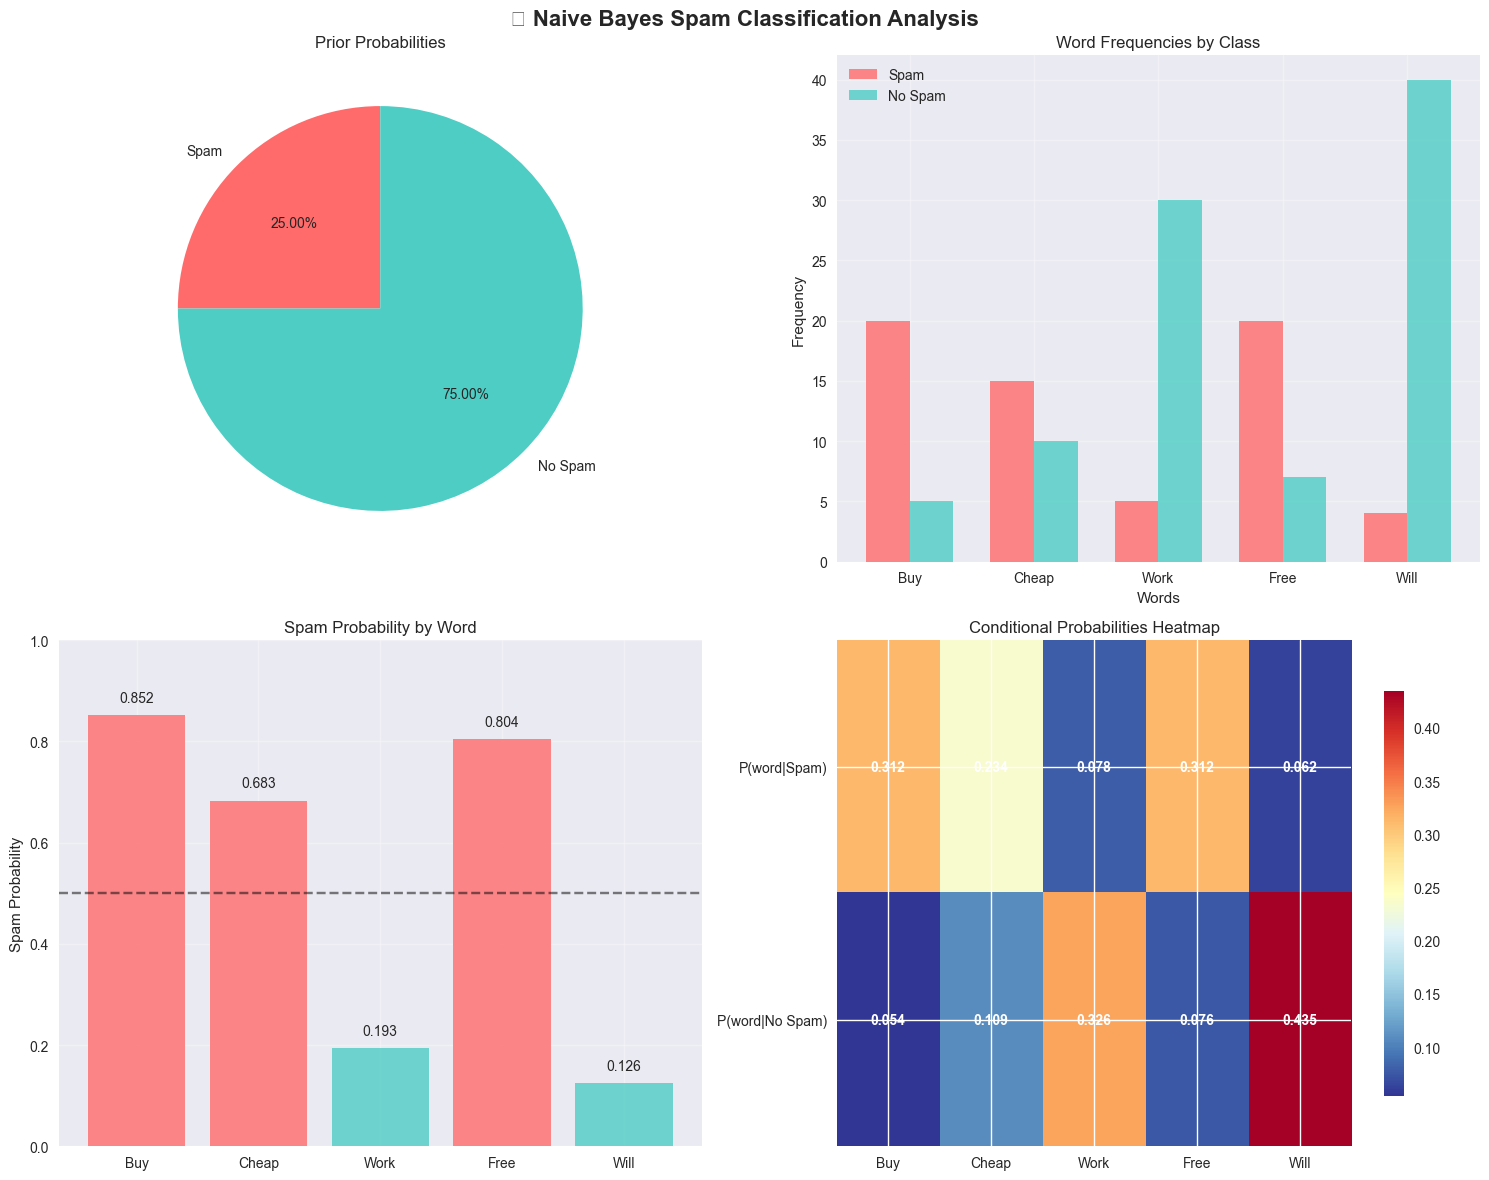

In [10]:
# สร้างกราฟแสดงผล
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Naive Bayes Spam Classification Analysis', fontsize=16, fontweight='bold')

# 1. Prior Probabilities
prior_data = ['Spam', 'No Spam']
prior_values = [P_spam, P_no_spam]
colors = ['#FF6B6B', '#4ECDC4']

axes[0,0].pie(prior_values, labels=prior_data, autopct='%1.2f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Prior Probabilities')

# 2. Word frequencies
x_pos = np.arange(len(words_df))
width = 0.35

axes[0,1].bar(x_pos - width/2, words_df['Spam'], width, 
              label='Spam', color='#FF6B6B', alpha=0.8)
axes[0,1].bar(x_pos + width/2, words_df['No_Spam'], width, 
              label='No Spam', color='#4ECDC4', alpha=0.8)

axes[0,1].set_xlabel('Words')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Word Frequencies by Class')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(words_df['Word'])
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Spam ratios
spam_ratios = [conditional_probs[word]['spam_ratio'] for word in words_df['Word']]
bars = axes[1,0].bar(words_df['Word'], spam_ratios, 
                     color=['#FF6B6B' if ratio > 0.5 else '#4ECDC4' for ratio in spam_ratios],
                     alpha=0.8)

axes[1,0].axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
axes[1,0].set_ylabel('Spam Probability')
axes[1,0].set_title('Spam Probability by Word')
axes[1,0].set_ylim(0, 1)
axes[1,0].grid(True, alpha=0.3)

# เพิ่มค่าบน bars
for bar, ratio in zip(bars, spam_ratios):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{ratio:.3f}', ha='center', va='bottom')

# 4. Conditional probabilities heatmap
cond_prob_data = np.array([
    [conditional_probs[word]['p_word_given_spam'] for word in words_df['Word']],
    [conditional_probs[word]['p_word_given_no_spam'] for word in words_df['Word']]
])

im = axes[1,1].imshow(cond_prob_data, cmap='RdYlBu_r', aspect='auto')
axes[1,1].set_xticks(range(len(words_df)))
axes[1,1].set_xticklabels(words_df['Word'])
axes[1,1].set_yticks([0, 1])
axes[1,1].set_yticklabels(['P(word|Spam)', 'P(word|No Spam)'])
axes[1,1].set_title('Conditional Probabilities Heatmap')

# เพิ่ม colorbar
plt.colorbar(im, ax=axes[1,1], shrink=0.8)

# เพิ่มค่าใน heatmap
for i in range(2):
    for j in range(len(words_df)):
        text = axes[1,1].text(j, i, f'{cond_prob_data[i, j]:.3f}',
                             ha="center", va="center", color="white", fontweight='bold')

plt.tight_layout()
plt.show()

## 🎓 9. สรุปและการวิเคราะห์

In [11]:
print("🎓 สรุปผลการวิเคราะห์ Naive Bayes Spam Classification")
print("=" * 80)

print("\n📊 ข้อมูลพื้นฐาน:")
print(f"   • รวม emails: {total_emails} ฉบับ")
print(f"   • Spam: {spam_emails} ฉบับ ({P_spam*100:.1f}%)")
print(f"   • No Spam: {no_spam_emails} ฉบับ ({P_no_spam*100:.1f}%)")
print(f"   • รวมคำในชุดข้อมูล: {len(words_df)} คำ")

print("\n🔍 คำที่มีแนวโน้มเป็น Spam สูง (Spam Ratio > 0.5):")
high_spam_words = []
for word in words_df['Word']:
    ratio = conditional_probs[word]['spam_ratio']
    if ratio > 0.5:
        high_spam_words.append((word, ratio))
        print(f"   • {word}: {ratio:.3f} ({ratio*100:.1f}%)")

print("\n✅ คำที่มีแนวโน้มเป็น No Spam สูง (Spam Ratio ≤ 0.5):")
low_spam_words = []
for word in words_df['Word']:
    ratio = conditional_probs[word]['spam_ratio']
    if ratio <= 0.5:
        low_spam_words.append((word, ratio))
        print(f"   • {word}: {ratio:.3f} ({ratio*100:.1f}%)")

print("\n🧮 สูตร Naive Bayes ที่ใช้:")
print("   P(Class|Message) = P(Class) × ∏P(word|Class)")
print("   โดยที่ Class = {Spam, No Spam}")

print("\n📈 ข้อสังเกต:")
print(f"   • คำที่บ่งบอก Spam มากที่สุด: {max(high_spam_words, key=lambda x: x[1])[0]}")
print(f"   • คำที่บ่งบอก No Spam มากที่สุด: {min(low_spam_words, key=lambda x: x[1])[0]}")
print("   • Model ใช้ assumption ว่าคำแต่ละคำเป็นอิสระต่อกัน (Naive assumption)")
print("   • สำหรับคำที่ไม่เคยเห็น สามารถใช้ Laplace Smoothing เพื่อป้องกัน zero probability")

print("\n🎯 การนำไปใช้งาน:")
print("   • Model นี้สามารถใช้เป็นพื้นฐานสำหรับ spam filter")
print("   • ควรมีข้อมูลฝึกที่มากขึ้นเพื่อความแม่นยำที่ดีขึ้น")
print("   • สามารถปรับปรุงโดยการเพิ่ม feature engineering (n-grams, TF-IDF, etc.)")

print("\n" + "=" * 80)
print("✅ การวิเคราะห์เสร็จสมบูรณ์!")

🎓 สรุปผลการวิเคราะห์ Naive Bayes Spam Classification

📊 ข้อมูลพื้นฐาน:
   • รวม emails: 100 ฉบับ
   • Spam: 25 ฉบับ (25.0%)
   • No Spam: 75 ฉบับ (75.0%)
   • รวมคำในชุดข้อมูล: 5 คำ

🔍 คำที่มีแนวโน้มเป็น Spam สูง (Spam Ratio > 0.5):
   • Buy: 0.852 (85.2%)
   • Cheap: 0.683 (68.3%)
   • Free: 0.804 (80.4%)

✅ คำที่มีแนวโน้มเป็น No Spam สูง (Spam Ratio ≤ 0.5):
   • Work: 0.193 (19.3%)
   • Will: 0.126 (12.6%)

🧮 สูตร Naive Bayes ที่ใช้:
   P(Class|Message) = P(Class) × ∏P(word|Class)
   โดยที่ Class = {Spam, No Spam}

📈 ข้อสังเกต:
   • คำที่บ่งบอก Spam มากที่สุด: Buy
   • คำที่บ่งบอก No Spam มากที่สุด: Will
   • Model ใช้ assumption ว่าคำแต่ละคำเป็นอิสระต่อกัน (Naive assumption)
   • สำหรับคำที่ไม่เคยเห็น สามารถใช้ Laplace Smoothing เพื่อป้องกัน zero probability

🎯 การนำไปใช้งาน:
   • Model นี้สามารถใช้เป็นพื้นฐานสำหรับ spam filter
   • ควรมีข้อมูลฝึกที่มากขึ้นเพื่อความแม่นยำที่ดีขึ้น
   • สามารถปรับปรุงโดยการเพิ่ม feature engineering (n-grams, TF-IDF, etc.)

✅ การวิเคราะห์เสร็จสมบูรณ์!

## 🚀 10. Challenge: ทดสอบกับคำใหม่ (Laplace Smoothing)

In [12]:
# ทดสอบกับคำที่ไม่มีในข้อมูล
print("🚀 Challenge: ทดสอบกับคำใหม่ (ใช้ Laplace Smoothing)")
print("=" * 70)

new_word_messages = [
    ['Hello'],  # คำใหม่
    ['Buy', 'Hello'],  # ผสมคำเก่าและใหม่
    ['NewWord', 'Unknown'],  # คำใหม่หลายคำ
]

for message in new_word_messages:
    print(f"\n📧 ทดสอบ: {message}")
    print("➡️ ไม่ใช้ Laplace Smoothing:")
    try:
        result1 = naive_bayes_classifier(message, use_laplace_smoothing=False)
    except:
        print("❌ Error: Zero probability")
    
    print("\n➡️ ใช้ Laplace Smoothing:")
    result2 = naive_bayes_classifier(message, use_laplace_smoothing=True, alpha=1)
    print("\n" + "─" * 50)

🚀 Challenge: ทดสอบกับคำใหม่ (ใช้ Laplace Smoothing)

📧 ทดสอบ: ['Hello']
➡️ ไม่ใช้ Laplace Smoothing:
📧 วิเคราะห์ message: ['Hello']

🎯 Prior Probabilities:
P(Spam) = 0.2500
P(No Spam) = 0.7500

🧮 คำนวณ Likelihood:
  Hello: ⚠️  ไม่พบในข้อมูล (ใช้ uniform probability หรือ smoothing)

📊 Posterior Probabilities:
P(Spam|message) ∝ 0.25000000
P(No Spam|message) ∝ 0.75000000

📈 Normalized Probabilities:
P(Spam|message) = 0.2500 (25.00%)
P(No Spam|message) = 0.7500 (75.00%)

🎯 การทำนาย: No Spam (ความมั่นใจ: 75.00%)

➡️ ใช้ Laplace Smoothing:
📧 วิเคราะห์ message: ['Hello']

🎯 Prior Probabilities:
P(Spam) = 0.2500
P(No Spam) = 0.7500

🧮 คำนวณ Likelihood:
  Hello: ⚠️  ไม่พบในข้อมูล (ใช้ uniform probability หรือ smoothing)
    → ใช้ Laplace smoothing: 0.014493, 0.010309

📊 Posterior Probabilities:
P(Spam|message) ∝ 0.00362319
P(No Spam|message) ∝ 0.00773196

📈 Normalized Probabilities:
P(Spam|message) = 0.3191 (31.91%)
P(No Spam|message) = 0.6809 (68.09%)

🎯 การทำนาย: No Spam (ความมั่นใจ: 68.09%)
